# 准备数据:

In [1]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

In [15]:
from keras.utils import np_utils

(x_train_0, y_train_0), (x_test_0, y_test_0)=cifar10.load_data()
print("one-hot前的形状")
print(y_train_0.shape)
print(y_test_0.shape)
y_train=np_utils.to_categorical(y_train_0)
y_test=np_utils.to_categorical(y_test_0)
print("one-hot后的形状")
print(y_train.shape)
print(y_test.shape)

print("处理前的最大值为%f" % x_train_0.max())
x_train=x_train_0/255
x_test=x_test_0/255
print("处理后的最大值%f" % x_train.max())
print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)

width,height=x_train_0.shape[1], x_train_0.shape[2]
print(width,height)


one-hot前的形状
(50000, 1)
(10000, 1)
one-hot后的形状
(50000, 10)
(10000, 10)
处理前的最大值为255.000000
处理后的最大值1.000000
x_train.shape: (50000, 32, 32, 3)
x_test.shape: (10000, 32, 32, 3)
32 32


# 尝试变换图像: (图像数据增强)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,      #随机旋转不超过30度
    horizontal_flip=True,   #随机水平翻转
    vertical_flip=True,     #随机竖直翻转
    width_shift_range=5,    #随机水平平移不超过5像素
    height_shift_range=5    #随机竖直平移不超过5像素
)

In [ ]:
#选取一张图像进行5次随机变换
origin_image=x_train[6]



#对图像做五次随机变换并画出来
fig, ax = plt.subplots(2,5, figsize=(15,3))

for i in range(2):
    for j in range(5):
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])

for i in range(5):
    ax[0][i].imshow(origin_image)
    ax[1][i].imshow(datagen.random_transform(origin_image))   #使用datagen对图像做随机变换

plt.tight_layout() #采用更紧凑美观的布局方式
plt.show()

# 构建模型:

In [16]:
import keras
from keras.datasets import mnist
from keras.models import Sequential      #线性模型框架
from keras.layers import Dense, Dropout, Flatten   #Dense全连接层; Flatten平铺层
from keras.layers import Conv2D, MaxPooling2D   #

print(width, height)
#keras中的线性模型
model=Sequential()  
#二维卷积层, 32个5X5的卷积核, 使用ReLU作为激活函数
model.add(Conv2D(32,(5,5),activation="relu",input_shape=(width,height,3))) 
#最大池化层: 2X2大小的池化核
model.add(MaxPooling2D(pool_size=(2,2))) 
#二维卷积层: 32个3x3的卷积核,使用ReLU作为激活函数
model.add(Conv2D(32, (3,3), activation="relu"))  
#最大池化层: 2X2大小的池化核
model.add(MaxPooling2D(pool_size=(2,2)))  
#平铺层: 将数据形状转为向量
model.add(Flatten())
#全连接层: 隐藏层维度为256, 使用ReLU作为激活函数
model.add(Dense(256, activation="relu"))
#全连接层: 隐藏层维度为10, 使用Softmax作为激活函数, 输出每个分类的概率
model.add(Dense(10,activation="softmax"))

model.summary()

#优化器
#Adam优化器, 损失函数:分类交叉熵
#度量指标: 准确率
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])


32 32
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               295168    
_________________________________________________________________
dense_9 (Dense)              (None, 10)         

# 3. 开始训练:

In [18]:
import time

start_time=time.time()
print("pre fit:" + str(start_time))
# time.sleep(2)
# model.fit(x_train, y_train, batch_size=24, epochs=10, validation_data=(x_test, y_test))
model.fit_generator(datagen.flow(x_train, y_train, batch_size=24), epochs=10, validation_data=(x_test, y_test))
end_time=time.time()
print("fit done:"+str(end_time))
print("duration:" + str(end_time-start_time))

pre fit:1634196721.541947
Epoch 1/10
2084/2084 [==============================] - 41s 19ms/step - loss: 0.6114 - accuracy: 0.7846 - val_loss: 1.0325 - val_accuracy: 0.6685
Epoch 2/10
2084/2084 [==============================] - 42s 20ms/step - loss: 0.5238 - accuracy: 0.8155 - val_loss: 1.1200 - val_accuracy: 0.6584
Epoch 3/10
2084/2084 [==============================] - 42s 20ms/step - loss: 0.4415 - accuracy: 0.8444 - val_loss: 1.1319 - val_accuracy: 0.6716
Epoch 4/10
2084/2084 [==============================] - 40s 19ms/step - loss: 0.3690 - accuracy: 0.8681 - val_loss: 1.2288 - val_accuracy: 0.6643
Epoch 5/10
2084/2084 [==============================] - 42s 20ms/step - loss: 0.3094 - accuracy: 0.8902 - val_loss: 1.3493 - val_accuracy: 0.6654
Epoch 6/10
2084/2084 [==============================] - 41s 20ms/step - loss: 0.2594 - accuracy: 0.9080 - val_loss: 1.4565 - val_accuracy: 0.6683
Epoch 7/10
2084/2084 [==============================] - 41s 20ms/step - loss: 0.2146 - accuracy: 0

# 结果展示:

In [49]:
score = model.evaluate(x_test, y_test)
print("损失为%f" % score[0])
print("准确度为%f" % score[1])

313/313 [==============================] - 2s 7ms/step - loss: 2.0084 - accuracy: 0.6619
损失为2.008427
准确度为0.661900


airplane
[2419 1210 3427 9142  604 8263 3019 7547 4010 2722]


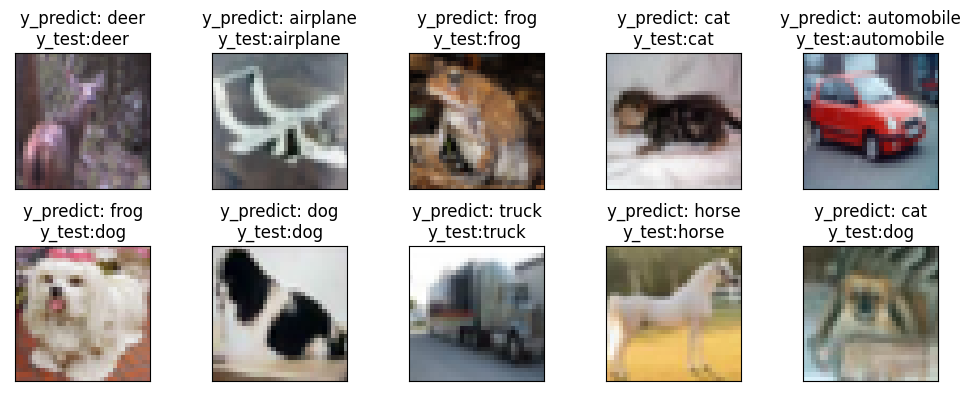

In [52]:
import numpy as np
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(labels[0])
error_id=np.random.choice(10000, size=10)
print(error_id)

y_predict=model.predict(x_test[error_id])
# print(y_predict.shape)
# for i in range(10):
#     print("识别结果:%d" % np.argmax(y_predict[i]))


fig, axes=plt.subplots(2,5, figsize=(10,4))
# print(axes.shape)
axes=axes.flatten()
# print(axes.shape)
for i, idx in enumerate(error_id):
    # print(i,idx)
    axes[i].imshow(x_test[idx])
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title("y_predict: %s\ny_test:%s" % (labels[np.argmax(y_predict[i])], labels[np.argmax(y_test[idx])]))
    
plt.tight_layout()
plt.show()

# 图像数据的转换: